In [4]:
import pandas as pd

inch_to_cm = 2.54
inch_to_feet = 1/12

#creates a pandas dataframe with the information provided
df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height #displays the dataframe

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [5]:
# the default is the sample/empirical covariance
# if you want the population variance, set ddof=0
df_height.cov() # computes the covariance (empirical)

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


In [6]:
df_height.corr() # computes the correlation

,height_inches,height_cm,height_feet
height_inches,1.0,1.0,1.0
height_cm,1.0,1.0,1.0
height_feet,1.0,1.0,1.0


In [7]:
# Or, with numpy
import numpy as np
y = np.array([0, 2, 2, 1, 0])
x1 = np.array([2, -1, -2, 0, 1])
x2 = np.array([-1, 1, 1, 0, -1])
x3 = np.array([1, 1, -1, -1, 0])

# If you want to fit the population covariance, set bias=True
C = np.cov([y, x1, x2, x3])
R = np.corrcoef([y, x1, x2, x3])

print(C, '\n')
print(R)

[[ 1.   -1.5   1.   -0.25]
 [-1.5   2.5  -1.5   0.75]
 [ 1.   -1.5   1.   -0.25]
 [-0.25  0.75 -0.25  1.  ]] 

[[ 1.         -0.9486833   1.         -0.25      ]
 [-0.9486833   1.         -0.9486833   0.47434165]
 [ 1.         -0.9486833   1.         -0.25      ]
 [-0.25        0.47434165 -0.25        1.        ]]


In [8]:
# set up the joint distribution
x = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

px = np.array([.4, .6])
py = np.array([.5, .5])
pxy = np.array(pd.crosstab(x, y)/10)
pxy

array([[0.4, 0. ],
       [0.1, 0.5]])

Each index of x and y (like x[0], y[0]) is a paired observation

**Marginal probabilities**

In the x array: 4 zeros, 6 ones → so P(X=0) = 4/10 = 0.4, P(X=1) = 6/10 = 0.6

In the y array: 5 zeros, 5 ones → P(Y=0) = 5/10 = 0.5

**Joint distribution**

pd.crosstab(x, y) creates a contingency table of counts of each (x,y) pair.

Dividing by 10 converts the counts to probabilities (relative frequencies).

For example, x=0, y=0 appears 4 times; x=0, y=1 appears 0 times; x=1, y=0 appears once; and finally x=1, y=1 appears 5 times. This the data that makes up the contingency table.

The array pxy = np.array([
    [0.4, 0.0],  # P(X=0, Y=0), P(X=0, Y=1)
    [0.1, 0.5]   # P(X=1, Y=0), P(X=1, Y=1)
])

Contains the probability for each pair (x, y).

So now we have:

Marginal (P(X), P(Y)), and joint P(X,Y) probabilities, so we can now compute mutual information, entropy, KL divergence, etc.

In [9]:
# calculate the mutual informations
Ixy = pxy[0,0] * np.log(pxy[0,0]/(px[0]*py[0])) + 0 + pxy[1,0] * np.log(pxy[1,0]/(px[1]*py[0])) + pxy[1,1] * np.log(pxy[1,1]/(px[1]*py[1]))
Ixx = px[0] * np.log(px[0]/px[0]**2) + px[1] * np.log(px[1]/px[1]**2)
Iyy = py[0] * np.log(py[0]/py[0]**2) + py[1] * np.log(py[1]/py[1]**2)

In [10]:
# normalized mutual information
NMIxy = Ixy/np.sqrt(Ixx * Iyy)
NMIxy

np.float64(0.6190442456588213)

In [11]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(x,y)

np.float64(0.618977004017456)

In [12]:
# correlation
np.corrcoef(x, y)

array([[1.        , 0.81649658],
       [0.81649658, 1.        ]])

Text(0, 0.5, 'y')

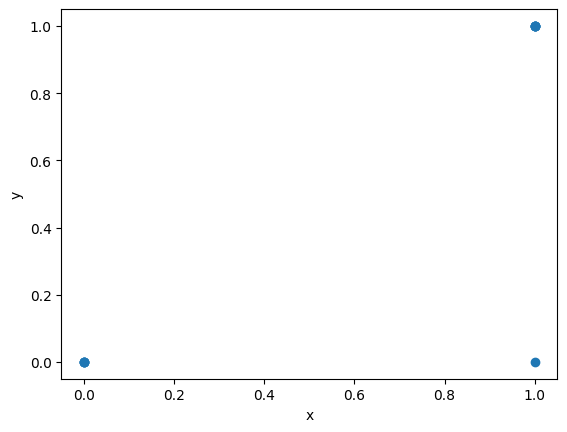

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x, y);
plt.xlabel('x')
plt.ylabel('y')